# Regressão (linear)

Método para modelar a relação entre uma variável e várias outras pertencentes ao mesmo domínio em estudo. A primeira é dita ser **dependente** das demais; ou seja, seu valor pode variar a depender dos valores das outras. Essas outras então são **explicativas** (**independentes**) da primeira.




## Objetivo nas Ciências Naturais e Sociais ==> _caracterizar_ essa relação

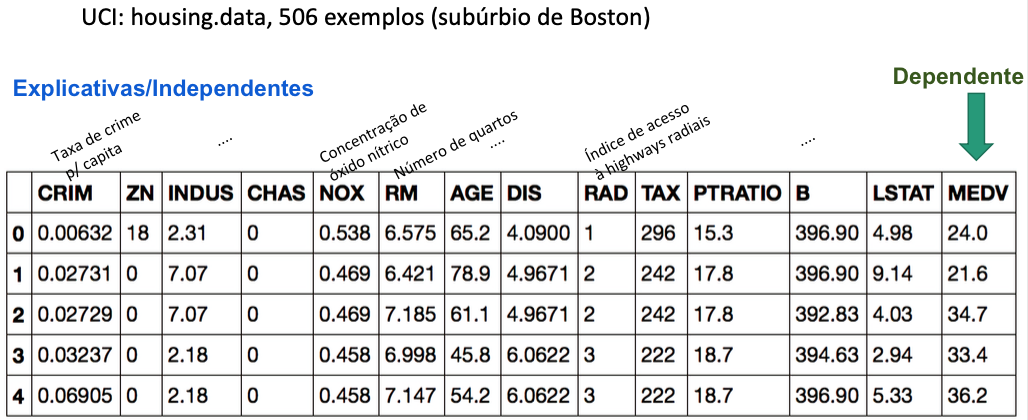

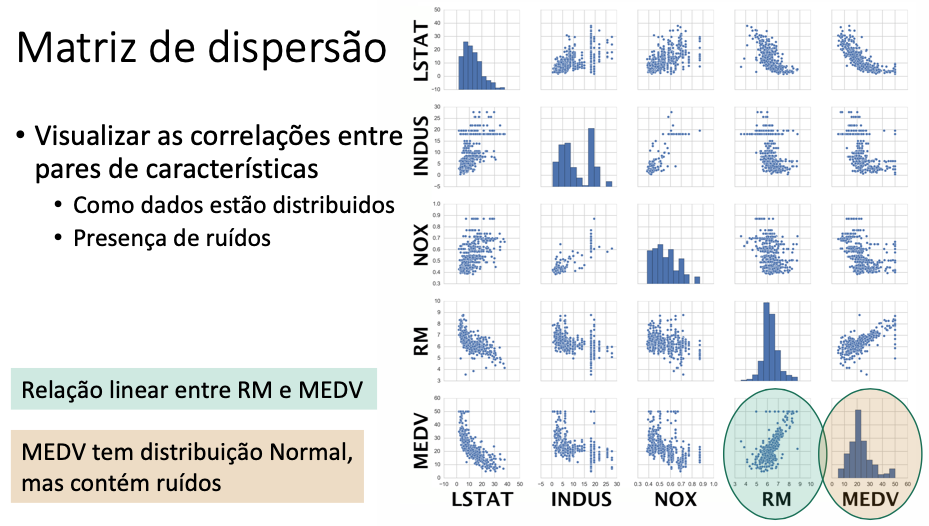

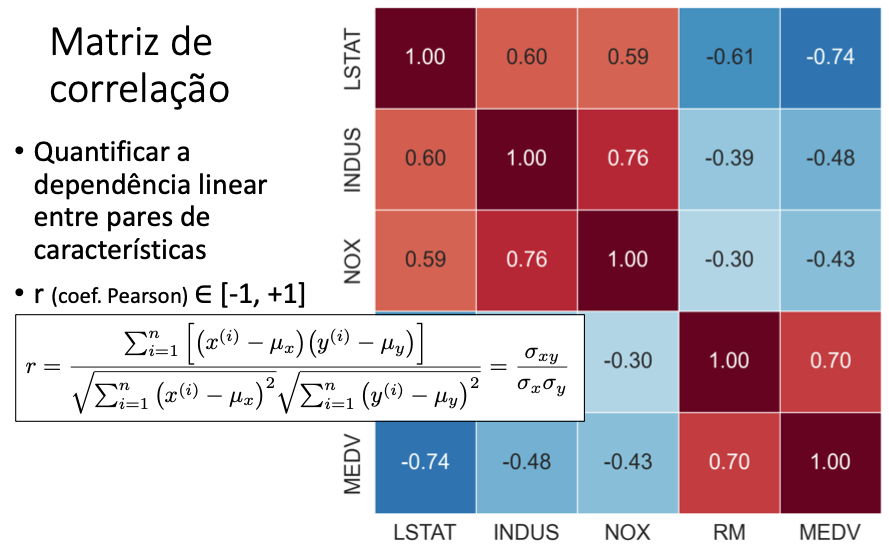

## Objetivo no Aprendizado de Máquina ==> _prever_ o valor ainda desconhecido para a variável dependente




| x1       | x2 | x3    | x4   | x5    | x6    | x7   | x8     | x9  | x10 | x11     | x12    | x13   | y    |
|----------|----|-------|------|-------|-------|------|--------|-----|-----|---------|--------|-------|------|
| CRIM     | ZN | INDUS | CHAS | NOX   | RM    | AGE  | DIS    | RAD | TAX | PTRATIO | B      | LSTAT | MEDV |
| 0.073201 | 0  | 3.01  | 0    | 0.413 | 6.201 | 49.0 | 5.9803 | 2   | 232 | 18.5    | 395.90 | 6.44  | ?    |

O preço da casa é estimado como sendo uma **soma ponderada** de suas variáveis (**características**) (+ um _bias_)

$\hat{y} = w_1  x_1 + ... + w_{13}  x_{13} + b$  

$\hat{y} = w_1  x_1 + ... + w_n  x_n + b$  

$\hat{y} = \mathbf{w}^\top \mathbf{x} + b$

com... 

$\mathbf{w}^\top = 
\begin{bmatrix}
w_1 & w_2 & ... & w_n
\end{bmatrix}$ e $\mathbf{x} = 
\begin{bmatrix}
x_1 \\
x_2 \\
... \\
x_n
\end{bmatrix}$

### Visualmente

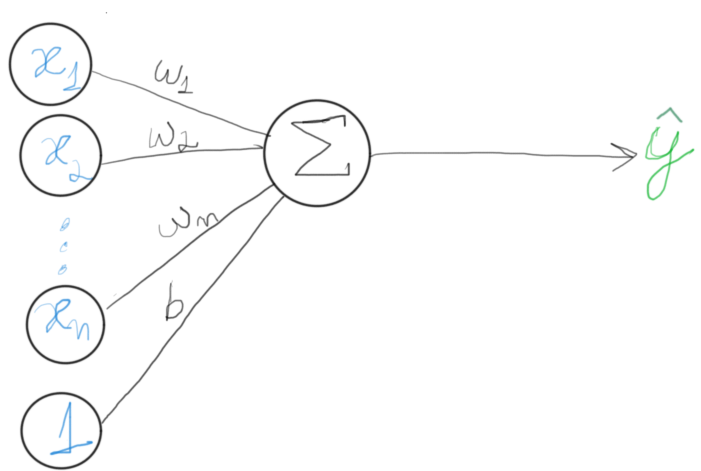

**Paralelo com o neurônio natural**

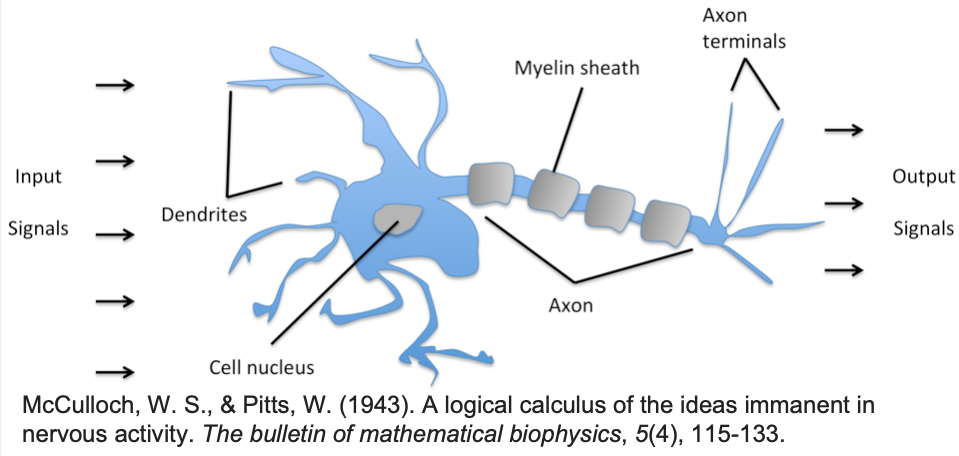

### Ilustrando com uma única variável independente

$y = w_1  x_1 + b$ ou, simplesmente, $y = a  x + b$

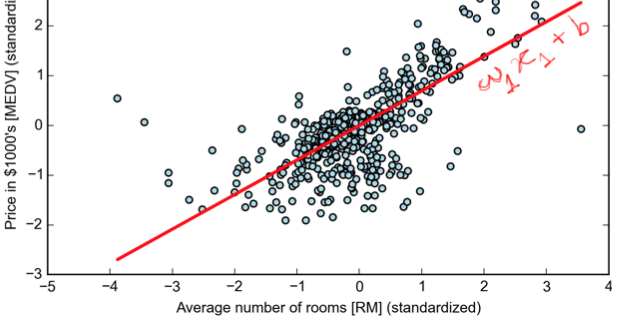

**ATENÇÃO!!!**

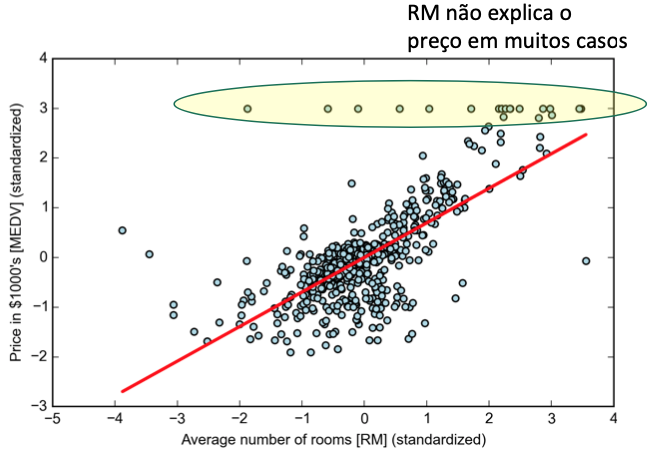

## Mas e O QUE É APRENDER, afinal?

### Visualmente...

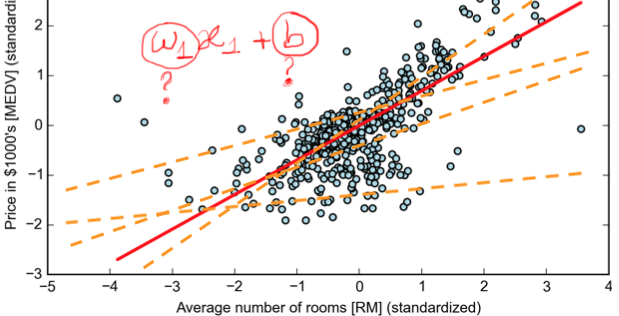

## Mas e O QUE É APRENDER, afinal?

### Formalmente...



**FUNÇÃO DE ERRO ( _LOSS_ )** 

$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$
**==> Diferença entre o valor previsto e o real.**

Usamos o que já conhecemos do mundo, ou seja, os exemplos anteriores **(BASE DE TREINAMENTO)** para encontrar os valores de $w$ e $b$ que **minimizam** o erro. Como são vários exemplos, calculamos a **MÉDIA DA SOMA DOS ERROS (QUADRÁTICOS)**...

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

... para descobrir...

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

## Mas COMO aprender?

Como $L(\mathbf{w}, b)$ é uma função convexa, podemos usar o GRADIENTE da função ($\Delta L(\mathbf{w}, b)$) como um guia/orientação.

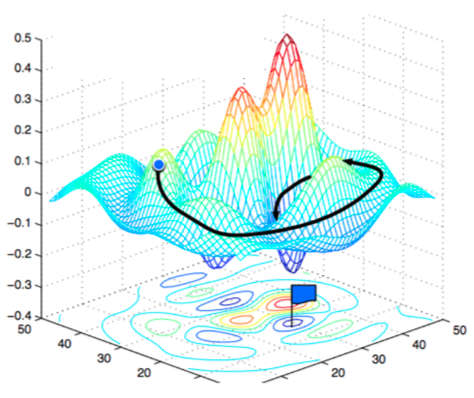

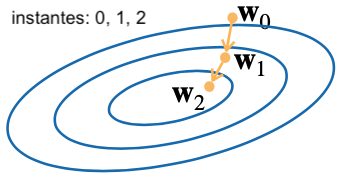

### DESCIDA DO GRADIENTE (_Gradient Descent_)
$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$

onde...  
$\eta$ = **Taxa de Aprendizado** e  
$|\mathcal{B}|$ = **Tamanho do BATCH de treinamento** ( subconjunto de exemplos da base)

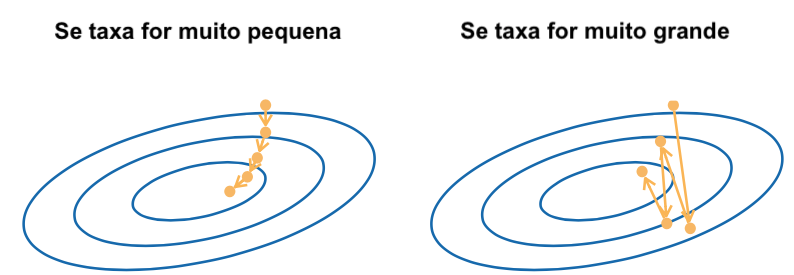

## ALGORITMO: [Mini-batch] Stochastic Gradient Descent (SGD)

1. Defina $\eta$ e $|\mathcal{B}|$
2. Gere aleatoriamente o vetor de pesos inicial (instante t=0): $W_{t=0}$
3. Selecione aleatoriamente o subconjunto de exemplos $\mathcal{B}$
4. Atualize o vetor de pesos (instante t) usando a DESCIDA DO GRADIENTE
5. Teste critério de parada (ex: #iterações/épocas, limiar de erro, etc)  
   5.1 Se atender: ENCERRE.  
   5.2 Se não: repita 3,4,5
   
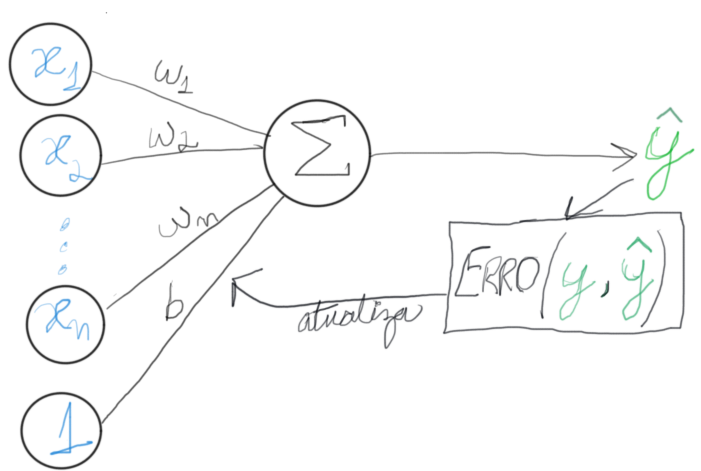

## EXEMPLO PRÁTICO COM DADOS FICTÍCIOS

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

### Geração do _dataset_ fictício

- Gerar valores de duas variáveis independentes (características) para 1000 exemplos: $\mathbf{x}\in \mathbb{R}^{1000 \times 2}$
- Pesos REAIS (a serem descobertos): $\mathbf{w} = [2, -3.4]^\top$ e bias $b = 4.2$
- Gerar variável dependente para cada exemplo: $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$ (ruído gaussiano de média 0 e desvio 0.01) 

In [2]:
num_inputs = 2 #Duas características x1 e x2
num_examples = 1000 #1000 exemplos para treinamento
true_w = nd.array([2, -3.4]) #inicialização dos pesos w1 e w2
true_b = 4.2 #inicialização do bias
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs)) #geração dos valores de x
labels = nd.dot(features, true_w) + true_b #geração dos valores de y
labels += nd.random.normal(scale=0.01, shape=labels.shape) #adição do ruído

### Plotagem de $x_2$ e $y$

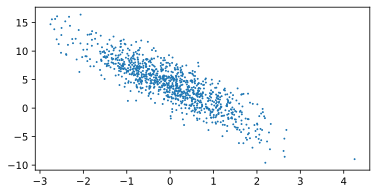

In [3]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

### Leitura dos dados

Itera sobre os exemplos de treinamento e retorna o subconjunto de exemplos que comporão o batch de cada iteração.

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

## Teste de impressão de um pequeno _batch_ de 10 exemplos
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.00294514 -0.8033465 ]
 [-0.40975535  2.1183805 ]
 [-0.9671724   0.49694175]
 [ 0.08197536  0.15488459]
 [-0.0842585  -0.73394597]
 [-1.2186161   0.998053  ]
 [ 1.591328    0.24141619]
 [-0.08295607 -0.5464172 ]
 [ 1.3810002  -0.76296663]
 [ 0.38076088  0.70695055]]
<NDArray 10x2 @cpu(0)> 
[ 6.934895   -3.8319242   0.58404267  3.8285573   6.529941   -1.6386467
  6.545585    5.87861     9.539722    2.5599897 ]
<NDArray 10 @cpu(0)>


### Definições e execução do treinamento

#### Inicializar parâmetros do modelo

In [5]:
# pesos gerados segundo distribuição Normal com média 0 e desvio 0.01
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
# bias definido como 0
b = nd.zeros(shape=(1,))

#### Anexar gradientes aos parâmetros

In [6]:
w.attach_grad()
b.attach_grad()

#### Definir o Modelo Linear

In [7]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

#### Definir a Função de Erro (_Loss_)

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#### Definir algoritmo de otimização: [Mini-batch] Stochastic Gradient Descent (SGD)

In [10]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

#### Treinar o modelo de fato, executando o SGD

In [12]:
lr = 0.03  # taxa de aprendizado
num_epochs = 5  # critério de parada: número de iterações
net = linreg  # modelo linear
loss = squared_loss  # função de custo 0.5 (y-y')^2

w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

##
## ITERAÇÃO
##
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Erro do minibatch
        l.backward()  # gradiente do custo em relação à [w,b]
        sgd([w, b], lr, batch_size)  # Atualiza parâmetros
    train_l = loss(net(features, w, b), labels)
    print('epoca %d, erro %f' % (epoch + 1, train_l.mean().asnumpy()))

epoca 1, erro 0.035095
epoca 2, erro 0.000127
epoca 3, erro 0.000049
epoca 4, erro 0.000049
epoca 5, erro 0.000048


#### Avaliar a qualidade do modelo treinado

In [13]:
print('w real', true_w)
print('b real', true_b)
print(w)
print(b)
print('Erro na estimativa de w (em %)', 100*abs((true_w - w.reshape(true_w.shape))/true_w))
print('Erro na estimativa de b (em %)', 100*abs((true_b - b)/true_b))

w real 
[ 2.  -3.4]
<NDArray 2 @cpu(0)>
b real 4.2

[[ 1.999413 ]
 [-3.4002373]]
<NDArray 2x1 @cpu(0)>

[4.200101]
<NDArray 1 @cpu(0)>
Erro na estimativa de w (em %) 
[0.02934933 0.00697725]
<NDArray 2 @cpu(0)>
Erro na estimativa de b (em %) 
[0.00240689]
<NDArray 1 @cpu(0)>


## EXEMPLO PRÁTICO COM DADOS FICTÍCIOS
## (Versão com `mxnet.gluon`)

### Geração de dataset fictício

In [14]:
from mxnet import autograd, nd

num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

### Leitura dos dados

In [15]:
from mxnet.gluon import data as gdata

batch_size = 10
# Combina as características e a variável dependente
dataset = gdata.ArrayDataset(features, labels)
# Minibatches
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

# Imprimir batch exemplo
for X, y in data_iter:
    print(X, y)
    break


[[ 0.44107553  0.25636742]
 [-1.1428989  -2.0935128 ]
 [-0.40909502  0.1813641 ]
 [ 0.8594831  -1.3383203 ]
 [ 0.60921013 -1.3575662 ]
 [ 0.9906758   1.665719  ]
 [-0.63341045  0.69660157]
 [ 2.0742357  -0.4926651 ]
 [-0.74806494  0.82127714]
 [-0.6106316  -0.8672201 ]]
<NDArray 10x2 @cpu(0)> 
[ 4.2165217   8.999834    2.7704165  10.463319   10.033678    0.5205447
  0.57359093 10.024858   -0.09142839  5.939665  ]
<NDArray 10 @cpu(0)>


#### Definir o modelo linear

In [18]:
from mxnet.gluon import nn
net = nn.Sequential()
net.add(nn.Dense(1))

#### Inicializar os parâmetros do modelo

In [19]:
from mxnet import init
# distribuição Normal com média 0 e desvio 0.01
# bias = 0 (default)
net.initialize(init.Normal(sigma=0.01))

#### Definir função de erro

In [20]:
from mxnet.gluon import loss as gloss
loss = gloss.L2Loss()

#### Definir algoritmo de otimização: [Mini-batch] Stochastic Gradient Descent (SGD)

In [21]:
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

#### Treinar o modelo de fato, executando o SGD

In [23]:
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.000049
epoch 2, loss: 0.000049
epoch 3, loss: 0.000049
epoch 4, loss: 0.000049
epoch 5, loss: 0.000049


#### Avaliar a qualidade do modelo treinado

In [24]:
w = net[0].weight.data()
print('Erro na estimativa de w', true_w.reshape(w.shape) - w)
b = net[0].bias.data()
print('Erro na estimativa de b', true_b - b)

Erro na estimativa de w 
[[-7.9870224e-05 -3.2734871e-04]]
<NDArray 1x2 @cpu(0)>
Erro na estimativa de b 
[0.00048923]
<NDArray 1 @cpu(0)>


# Referências para estudo

## Seções 3.1, 3.2 e 3.3 de [Dive into Deep Learning](https://d2l.ai/index.html)